In [1]:
#import package
import sympy as sym
sym.init_printing()
from IPython.display import display_latex
from IPython.display import Latex,Math,display
import numpy as np
from functools import reduce

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(){return false}

<IPython.core.display.Javascript object>

**Theroem**

**If $T$ is a linear endomorphism of the vector space $V$ over an algebraically closed field $\mathbb{F}$, then there is a basis such that the matrix representation of $T$ is in Jordan Normal Form.**

**Algorithm JNF: Symbolic Jordan Normal Form**

**Input: $A\in\mathbb{C}^{n\times n}$**

**Output: $J\in\mathbb{C}^{n\times n}$ where $J$ is the Jordan Normal Form of $A$**

1. Find all eigenvalues $\lambda_1,\cdots,\lambda_N$ with algebraic multiplicity $m_1,\cdots,m_N$ such that $\sum_{k=1}^N m_k=n$
2. Determine all eigenspaces $E(\lambda_k,A)$ and generalized eigenspaces $E^{\textbf{gen}}(\lambda_k, A)$ as the nullspaces of $(A-\lambda_k I)$ and $(A-\lambda_k I)^{m_k}$ respectively.
3. **for** $k$ **from** $1$ **to** $N$:
4. $\quad\quad$Find $C$ such that $E^{\textbf{gen}}(\lambda_k, A)=E(\lambda_k, A)\oplus C$, Let $S=E(\lambda_k, A)$, $i=1$
5. $\quad\quad$**While** $C\ne \left\{0\right\}$:
6. $\quad\quad\quad\quad$Find a vector $v\in C$ such that $v$ is not in the column space of $(A-\lambda_k I)$
7. $\quad\quad\quad\quad$**do:**
8. $\quad\quad\quad\quad\quad\quad v\leftarrow (A-\lambda_k I)v$
9. $\quad\quad\quad\quad$**while** $v\notin E(\lambda_k,A)$
10. $\quad\quad\quad\quad$Denote all $v$ in line 6 and 8 as $v_{1i}^{(k)},\cdots,v_{ji}^{(k)},\cdots$ 
(earlierly generated $v$ has bigger index $j$)
11. $\quad\quad\quad\quad$Find $S',C'$ such that $S=\text{span}(v_{1i}^{(k)})\oplus S'$ and $C=\text{span}(v_{2i}^{(k)},\cdots,v_{ji}^{(k)},\cdots)\oplus C'$
12. $\quad\quad\quad\quad S\leftarrow S',\ C\leftarrow C'$
13. $\quad\quad\quad\quad i\leftarrow i+1$
14. $\quad\quad$**if** $S\ne\left\{0\right\}$:
15. $\quad\quad\quad\quad$Denote basis of $S$ as $v_{1i}^{(k)},\cdots,v_{1m_k}^{(k)}$
16. Let $P$ be a matrix whose columns are $v_{11}^{(1)},\cdots,v_{j1}^{(1)},\cdots,v_{12}^{(1)},\cdots,v_{j2}^{(1)},\cdots,v_{ji}^{(1)},\cdots, v_{ji}^{(2)},\cdots,v_{ji}^{(k)},\cdots$
17. **return** $J=P^{-1}AP$

In [3]:
def ColumnContact(M):
    ''' Join the list of column vectors into a matrix. '''
    m = M.copy()
    r = m[0]
    for i in range(1,len(m)):
        r = r.row_join(m[i])
    return r

def is_in_space(space,v):
    ''' Judge whether the vector v is in the space. '''
    S = space.copy()
    vect = v.copy()
    dim_S = len(S)
    S.append(vect)
    if ColumnContact(S).rank() > dim_S:
        return False
    return True

def complementary(g,s):
    ''' Find r such that g is the direct sum of s and r. '''
    G = g.copy()
    S = s.copy()
    dim_diff = len(G) - len(S)
    R = []
    for vect in G:
        if len(R) == dim_diff:
            return R
        if not is_in_space(S,vect):
            R.append(vect)
    return R
        
def JordanForm_analysis(A, opt):
    ''' Calculate the Jordan Normal Form of A with analysis. '''

    n = A.shape[0]
    evs = A.eigenvects()
    num = len(evs)
    
    list_of_eigenvalues = [vals[0] for vals in evs]
    list_of_algebraic = [vals[1] for vals in evs]
    list_of_matrices = [A - r * sym.eye(n) for r in list_of_eigenvalues]
    list_of_genmatrices = [(A - list_of_eigenvalues[i] * sym.eye(n)) ** list_of_algebraic[i] for i in range(num)]
    list_of_spaces = [M.nullspace() for M in list_of_matrices]
    list_of_genspaces = [M.nullspace() for M in list_of_genmatrices]
    list_of_transform = []
    string = ""
    totalstrings = ""

    if opt:
        display(Math(r'The\  Matrix\ A\ is'))
        display(A)
        display(Math(r'The\ eigenvalues\ of\ A\ and\ their\ algebraic\ multiplicity\ are'))
        for k in range(num):
            display(Math(r'\lambda_{}={}\quad\quad\quad m_{}={}'.format(k+1,list_of_eigenvalues[k],k+1,list_of_algebraic[k])))
    
    for k in range(num):
        
        phi = list_of_matrices[k]
        eigspace = list_of_spaces[k]
        genspace = list_of_genspaces[k]
        complement = complementary(genspace, eigspace)
        list_of_vij = []
        i = 1
        
        if opt:
            display(Math(r'({})\ Consider\ the\ eigenvalue\  \lambda_{}={}\ with\ algebraic\ multiplicity\ m_{}={}'
                         .format(k+1,k+1,list_of_eigenvalues[k],k+1,list_of_algebraic[k])))
            display(Math(r'The\ Matrix\ A-({})I\ and\ (A-({})I)^{}\ are'
                         .format(list_of_eigenvalues[k],list_of_eigenvalues[k],list_of_algebraic[k])))
            display([list_of_matrices[k],list_of_genmatrices[k]])
            display(Math(r'The\ corresponding\ eigenspace\ E({},A)\ is\ the\ nullspace\ of\ A-({})I,\ which\ is\ spanned\ by'
                     .format(list_of_eigenvalues[k],list_of_eigenvalues[k])))
            display(eigspace)
            display(Math(
                r'And\ the\ corresponding\ generalized\ eigenspace\ E^g({},A)\ is\ the\ nullspace\ of\ (A-({})I)^{},\ which\ is\ spanned\ by'
                     .format(list_of_eigenvalues[k],list_of_eigenvalues[k],list_of_algebraic[k])))
            display(genspace)
        
        while len(complement) > 0:
            j = 1
            list_of_bunch = []
            vect = complement[0]
            if opt:
                string = 'v_{'+str(j)+str(i)+'}^{('+str(k+1)+')}'
                display(Math(r'Now\ we\ choose\ a\ vector\ v\ in\ E^g({},A)\ but\ not\ in\ E({},A),\ i.e.'
                         .format(list_of_eigenvalues[k],list_of_eigenvalues[k])))
                display(vect)
            while not is_in_space(list_of_spaces[k], vect):
                list_of_bunch.insert(0, vect)
                vect = phi * vect 
                j = j + 1 
                if opt:
                    string = string + r',\ v_{'+str(j)+str(i)+'}^{('+str(k+1)+')}'
            eigspace = complementary(eigspace, [vect])
            complement = complementary(complement, list_of_bunch)
            list_of_bunch.insert(0, vect)     
            list_of_vij.extend(list_of_bunch)
            i = i + 1
            if opt:
                display(Math(r'Apply\ A-({})I\ on\ v\ constantly\ (untill\ v\in E({},A))\ derives\ a\ bunch\ of\ vectors\ '
                             .format(list_of_eigenvalues[k],list_of_eigenvalues[k])))
                display(Math(r'['+string+']='))
                display(list_of_bunch)
                totalstrings = totalstrings + string + r',\ '   
            
        if len(eigspace)>0:
            list_of_vij.extend(eigspace)
            if opt:
                j = 1
                string = 'v_{'+str(j)+str(i)+'}^{('+str(k+1)+')}'
                for js in range(len(eigspace)-1):
                    j = j + 1
                    string = string + r',\ v_{'+str(j)+str(i)+'}^{('+str(k+1)+')}'
                display(Math(
                    r'At\ this\ time,\  we\ need\ to\ find\ the\ remaining\ element(s)\ in\ E({},A)\ for\ extending\ to\ a\ basis'
                .format(list_of_eigenvalues[k])))
                display(Math(r'['+string+']='))
                display(eigspace)
                totalstrings = totalstrings + string + r',\ '
                
        list_of_transform.extend(list_of_vij)            
        
    P = ColumnContact(list_of_transform)
    J = sym.Inverse(P)*A*P
    if opt:
        display(Math(r'Finally,\ the\ invertible\ matrix\ P=['+totalstrings[:-3]+']='))
        display(P)
        display(Math(r'And\ hence,\ the\ Jordn\ Normal\ Form\ is\ given\ by\ J=P^{-1}AP='))
        display(J)
    
    return J

def JordanForm(A):
    '''# Calculate the Jordan Normal Form of A without analysis. '''  
    
    return JordanForm_analysis(A, False)

<IPython.core.display.Math object>

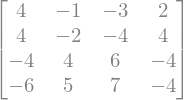

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

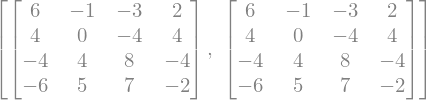

<IPython.core.display.Math object>

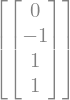

<IPython.core.display.Math object>

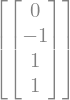

<IPython.core.display.Math object>

<IPython.core.display.Math object>

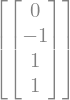

<IPython.core.display.Math object>

<IPython.core.display.Math object>

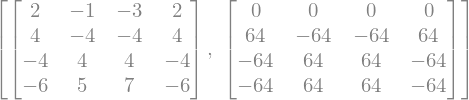

<IPython.core.display.Math object>

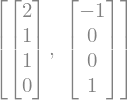

<IPython.core.display.Math object>

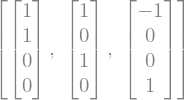

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

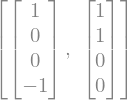

<IPython.core.display.Math object>

<IPython.core.display.Math object>

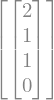

<IPython.core.display.Math object>

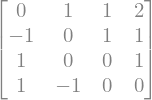

<IPython.core.display.Math object>

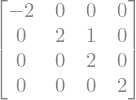

In [4]:
A = sym.Matrix([[4,-1,-3,2],[4,-2,-4,4],[-4,4,6,-4],[-6,5,7,-4]])

# using JordanForm_analysis function to transform A
J = JordanForm_analysis(A,True)